# Model (general undirected graph structure)

### Typical evolution

In [1]:
import scipy
import random as rnd
import copy
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter

def initialize_particles(N, H): #At time 0 all particles are initialised in 0 (this should enter barphilist)
    # Initialise particle counts on each node.
    particles_on_nodes = [0] * H
    
    # Place N particles on the source node (node 0).
    particles_on_nodes[0] = N
    
    return particles_on_nodes

def simulate_dynamics_1(N, H, T, beta, transition_matrix, time, pres): #particles removed deterministically proportionally to the node population
    particles_on_nodes = initialize_particles(N, H)
    fraction_of_time_fraction_of_particles = [0] * H
    temp = [0] * H
    time_trajectory_particle_density = list()
    time_trajectory_particle_density.append(particles_on_nodes)    
    
    if transition_matrix == 'uniform': #the same uniform matrix driving the particles step by step
        print('yes')
        for t in range(T):
            new_particles_on_nodes = [0] * H

            for node in range(H):
                for particle in range(particles_on_nodes[node]):
                    # Simulate particle hopping to a random node different from the current node.
                    nodes = [i for i in range(H) if i != node]
                    new_node = rnd.choice(nodes)
                    new_particles_on_nodes[new_node] += 1
            # Remove M particles at random from the nodes with particles.
            nodes_with_particles = [node for node in range(H) if new_particles_on_nodes[node] > 0]
            temp_particles = 0
            for i in nodes_with_particles:
                rho3 = new_particles_on_nodes[i]/(N * 1.0)
                temp_temp = round(pres*(rho3**beta)*rho3*N)
                temp_particles += temp_temp
                new_particles_on_nodes[i] -= temp_temp
            new_particles_on_nodes[0] += temp_particles #if first killing and then generating (reset model)
            for i in range(H):
                temp[i] += np.asarray(new_particles_on_nodes)[i]/(N*1.0)

            particles_on_nodes = new_particles_on_nodes
            time_trajectory_particle_density.append(new_particles_on_nodes)
            fraction_of_time_fraction_of_particles = list((1/((t+1)*1.0))*np.asarray(temp))
    else: #different, possibly, transition matrices driving the system step by step (t indexes them)
        #print('no')
        for t in range(T):
            new_particles_on_nodes = [0] * H

            for node in range(H):
                for particle in range(particles_on_nodes[node]):
                    # Simulate particle hopping based on the transition matrix.
                    if(time == 0):
                        new_node = np.random.choice(H, p=transition_matrix[t][node])
                    else:
                        new_node = np.random.choice(H, p=transition_matrix[node])
                    new_particles_on_nodes[new_node] += 1

            # Remove M particles at random from the nodes with particles.
            nodes_with_particles = [node for node in range(H) if new_particles_on_nodes[node] > 0]
            temp_particles = 0
            for i in nodes_with_particles:
                rho3 = new_particles_on_nodes[i]/(N * 1.0)
                temp_temp = round(pres*(rho3**beta)*rho3*N)
                temp_particles += temp_temp
                new_particles_on_nodes[i] -= temp_temp
            new_particles_on_nodes[0] += temp_particles #if first killing and then generating (reset model)
            for i in range(H):
                temp[i] += np.asarray(new_particles_on_nodes)[i] / (N * 1.0)

            particles_on_nodes = new_particles_on_nodes
            time_trajectory_particle_density.append(new_particles_on_nodes)
            fraction_of_time_fraction_of_particles = list((1 / ((t + 1) * 1.0)) * np.asarray(temp))
    return time_trajectory_particle_density, fraction_of_time_fraction_of_particles

### Graph generation (unweighted)

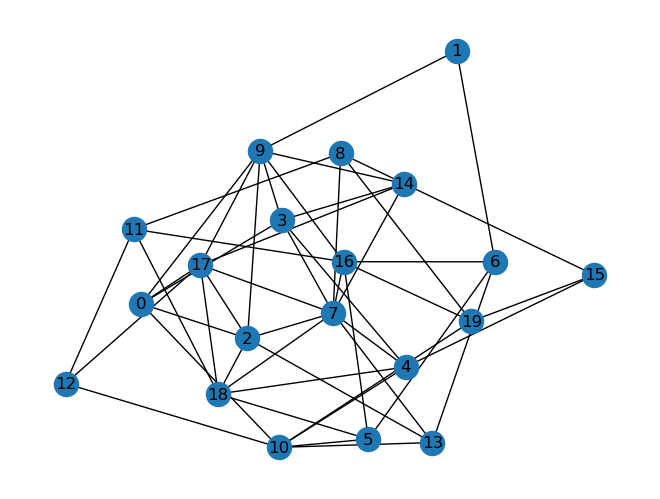

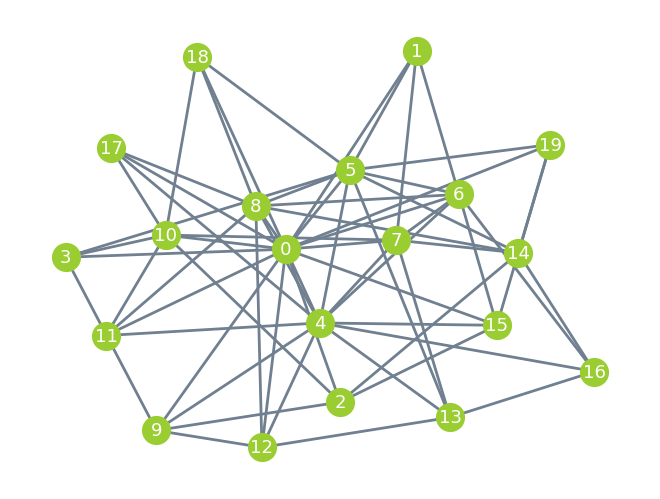

In [6]:
# Generate graph and adjacency matrix as numpy array (check always in the graphs that node 0 is not isolated)

H = 20  # Number of nodes in the graph


import networkx as nx

def generate_adjlist_with_all_edges(G, delimiter=" "):
     for s, nbrs in G.adjacency():
        line = [s]
        for t, data in nbrs.items():
                line.append(t)
        yield line[:]

## Erdos--Renyi random graph

m = 50  # edges
seed = 2010  # seed random number generators for reproducibility

# Use seed for reproducibility
G_ER = nx.gnm_random_graph(H, m, seed=seed)

A_ER = np.array(nx.adjacency_matrix(G_ER).todense())
#print("adjacency matrix")
#print(A_ER)

adj_list_ER = list()
for line in generate_adjlist_with_all_edges(G_ER):
    adj_list_ER.append(line)
#print(adj_list_ER)

pos = nx.spring_layout(G_ER, seed=seed)  # Seed for reproducible layout
nx.draw(G_ER, pos=pos, with_labels=True)
plt.show()


## Barabasi--Albert graph
m = 4 #Number of edges to attach from a new node to existing node, 1 <= m < H

G_BA = nx.barabasi_albert_graph(H, m, seed=seed, initial_graph=None)

A_BA = np.array(nx.adjacency_matrix(G_BA).todense())
#print("adjacency matrix")
#print(A_BA)

adj_list_BA = list()
for line in generate_adjlist_with_all_edges(G_BA):
    adj_list_BA.append(line)

pos = nx.spring_layout(G_BA, seed=seed)  # Seed for reproducible layout
nx.draw(G_BA, pos=pos, width=2, linewidths=0, edge_color="slategrey", font_color="w", font_size=13, node_color="yellowgreen", node_size = 440, with_labels=True)
plt.show()

# Generate unbiased transition matrix from adjacency matrix

degree_list = np.array([nx.degree(G_ER,v)*1. for v in range(H)])
Pi_ER = np.dot(np.diag(degree_list**(-1)),A_ER)

degree_list = np.array([nx.degree(G_BA,v)*1. for v in range(H)])
Pi_BA = np.dot(np.diag(degree_list**(-1)),A_BA)

### Graph generation (fully connected, but weighted)

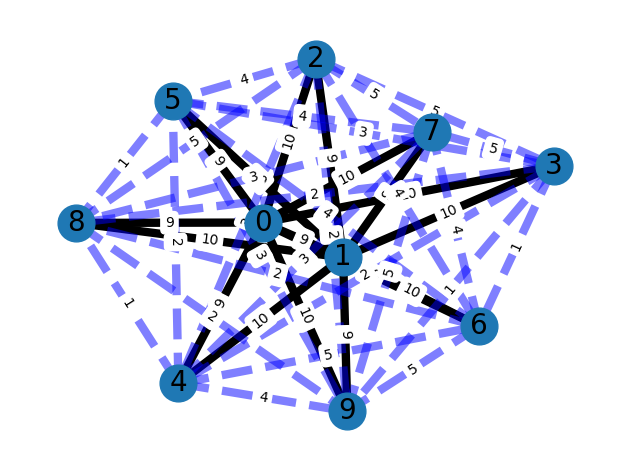

In [42]:
# Generate fully connected weighted graph

H = 10 # Number of nodes in the graph

import networkx as nx

G_weighted = nx.complete_graph(H)
for (u, v) in G_weighted.edges():
    if(u<=1):
        G_weighted.edges[u,v]['weight'] = rnd.randint(9,10)
    else:
        G_weighted.edges[u,v]['weight'] = rnd.randint(1,5)
    
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d["weight"] > 5]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d["weight"] <= 5]

pos = nx.spring_layout(G_weighted, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G_weighted, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G_weighted, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G_weighted, "weight")
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

# Generate transition matrix from weighted matrix
A = nx.adjacency_matrix(G_weighted).toarray()  # Convert to dense adjacency matrix
D = np.sum(A, axis=1)  # Degree matrix as a vector (sums of rows)

adj_list_weighted = list()
for line in generate_adjlist_with_all_edges(G_weighted):
    adj_list_weighted.append(line)

# Transition matrix
Pi_weighted = A / D[:, None]  # Normalize each row of A by its corresponding degree

### Setting graph to use

In [3]:
# To use for LD algo

adj_list = copy.deepcopy(adj_list_BA)
Pi = copy.deepcopy(Pi_BA)

### Typical behaviour simulation

In [8]:
# Example usage (many particles and long time)
N = 500  # Number of particles
H = 20    # Number of nodes in the fully connected graph
beta = 0. # Power law resetting coefficient (beta>0)
T = 100   # Number of time steps
p=0.

S = 50 #Number of simulations

#simulate_dynamics_1(# of particles, # of nodes, # time steps, beta, transition matrix used, 0 for step-by-step and 1 for stationary local time only, p reset value if beta=0)

array_fraction = list()
for s in tqdm.tqdm(range(S)):
    array_fraction.append(simulate_dynamics_1(N, H, T, beta, Pi, 1, p)[1]) #[0] will select step-by-step evolution, [1] only stationary local time

  0%|                                                    | 0/50 [00:00<?, ?it/s]/tmp/ipykernel_49058/1607629579.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if transition_matrix == 'uniform': #the same uniform matrix driving the particles step by step
100%|███████████████████████████████████████████| 50/50 [01:22<00:00,  1.64s/it]


/tmp/ipykernel_49058/3703505625.py:14: RuntimeWarning: divide by zero encountered in log
  rate.append(-1/(N*T*1.0)*np.log(proba[node_focus]))


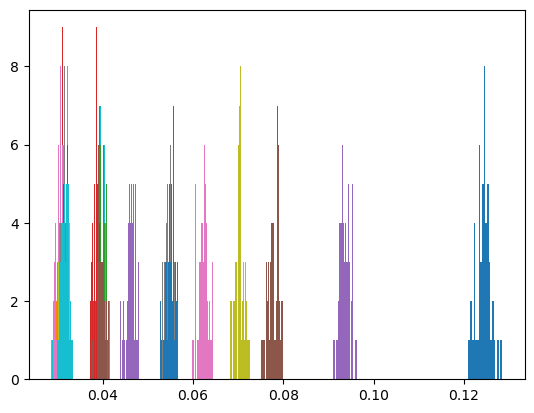

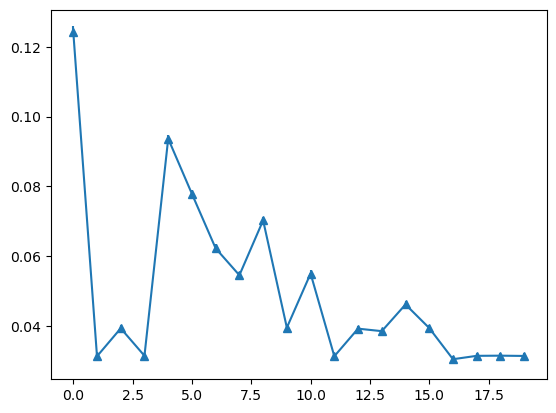

In [10]:
## Stationary state (by selecting [1] above)

proba = [0 for i in range(H)]
bins = [0 for i in range(H)]
rate = list()
x = list()
mean = list()
stdev = list()
for node_focus in range(H):
    x.append([np.array(array_fraction[s][node_focus]) for s in range(S)])
    proba[node_focus], bins[node_focus] = np.histogram(x[node_focus], bins=20)
    mean.append(np.mean(x[node_focus]))
    stdev.append(np.std(x[node_focus]))
    rate.append(-1/(N*T*1.0)*np.log(proba[node_focus]))
    plt.hist(x[node_focus], bins=20)
plt.show()

ascissa = [i for i in range(H)]
plt.errorbar(ascissa, mean, stdev, linestyle='-', marker='^')
#plt.scatter(0,H**(-1)+p*H**(-beta)-p*(1+beta)*H**(-1-beta),s=30,c='blue',alpha=0.3)
plt.show()

#for node_focus in range(H):
#    plt.plot(bins[node_focus][1:],rate[node_focus])
#plt.show()

# Large deviations (many particles and long time)

### where the original system is a uniform transition matrix

In [4]:
### Functions for large-deviation algorithm

from scipy.optimize import root_scalar

def betacriticalfun(beta,index,barphi,p):
    return ((1./(p*(1.+beta)))**(1./beta))*(1-(1./(1.+beta))) - barphi[index]

def func(rho3,index,beta,barphi,p):
    return rho3 - p*rho3**(beta+1) - barphi[index]

def normalized_vector(vector):
    vector_sum = sum(vector)
    normalized_vector = [element / vector_sum for element in vector]
    return normalized_vector

def rnd_gen():
    return rnd.random()

def equ(u,v,index,H,adjacency_list,transition_matrix):
    #print(v)
    temp = 0
    for node in range(H):
        if(node != index and node in adjacency_list[index][1:]):
            temp += v[node]*transition_matrix[index][node]
    if(temp==0):
        return 0.
    else:
        return 1./temp

def eqv(barphim,barphi,u,v,rho3,index,H,p,adjacency_list,transition_matrix):
    temp = 0
    for node in range(H):
        if(node != index and index in adjacency_list[node][1:]):
            temp += barphim[node]*u[node]*transition_matrix[node][index]
    if(index==s):
        if(temp != 0):
            temp1 = 0
            for j in range(H):
                if(j!=index):
                    temp1 += rho3[j]
            return (1./temp)*(1.-temp1)
        else:
            return 0. #Does this make any sense?
    else:
        if(temp != 0):
            return (1./temp)*rho3[index]
        else:
            return 0. #does it make sense?

### Selecting barphi list

In [161]:
##Setting up barphilist

s = 0 #source node is 0 also in the simulation (stick with it)
beta = 1.
H = 10
p = 1.
tolp = 1E-5

found_list = list()

barphilist = normalized_vector([rnd_gen() for i in range(H)])

found = True
if(barphilist[0] < p*(1./(H-1))**(beta)):
    barphilist[0]+=p*(1./(H-1))**(beta)
    found = False
    for i in range(H):
        if(barphilist[i]>p*(1./(H-1))**(beta) and i!=0):
            found = True
            barphilist[i]-=p*(1./(H-1))**(beta)
            break
    removed = 0
    if(found==False): #we remove it in small chunks
        little_chunk = p*((1./(H-1))**(beta))/(H-1)
        for i in range(H):
            if(barphilist[i]>little_chunk and i!=0):
                barphilist[i]-=little_chunk
                removed+=little_chunk
    if(removed==p*(1./(H-1))**(beta)):
        found=True
found_list.append(found)

#print(found_list) #only when True is found for all entries, the rare event considered is a good one.

print(barphilist, "\n")

index_max = np.argmax(barphilist[1:])+1

#check that p is abov pcritical
pcritical = 1 - barphilist[index_max]
print("p critical", pcritical)
#p = pcritical+0.02

# check that beta is above beta critical
betasol = root_scalar(betacriticalfun,args=(index_max,barphilist,p),method='bisect',bracket=[(1-p)/p+tolp,100.])
betacritical = betasol.root
print("beta critical", betacritical)

[0.17598104101934361, 0.15187763994527087, 0.039436289005982006, 0.17585640711982028, 0.09379972066491403, 0.13033693748046565, 0.03903370241316598, 0.08285770813591722, 0.06581512184597638, 0.04500543236914402] 

p critical 0.8241435928801797
beta critical 0.6203835317656216


### Running LD algo

In [162]:
## Running algorithm

u0 = [rnd.random() for _ in range(H)]
v0 = [rnd.random() for _ in range(H)]

erru = list()
errv = list()

#maxit = 10000
tolerance = 1E-9
epsilon = 0.2 #Learning rate

max_rho3 = scipy.optimize.fmin(lambda x: -func(x, index_max, beta, barphilist,p), 0.5, disp=False)

rho3 = list()
temp = 0
for index in range(H):
    if(index!=s):
        sol = root_scalar(func,args=(index,beta,barphilist,p),method='bisect',bracket=[0.,max_rho3[0]])
        temp += sol.root
        rho3.append(sol.root)
rho3.insert(0,1-temp)

#rho3 should be positive and the sum over all components equal to 1, if that is not the case, we cannot accept it

print(rho3)
print(sum(rho3))

error = 1.

while(error > tolerance):
    u = list()
    v = list()
    for index in range(H):
        u.append(equ(u0,v0,index,H,adj_list,Pi))
    #print("u:", u, "\n")
    for index in range(H):
        v.append(eqv(barphilist,barphilist,u0,v0,rho3,index,H,p,adj_list,Pi))
    #print("v:", v, "\n")

    error = np.max(np.abs(list(np.asarray(u)-np.asarray(u0))+list(np.asarray(v)-np.asarray(v0))))
    u0 = np.asarray(copy.deepcopy(u0))*(1-epsilon) + np.asarray(copy.deepcopy(u))*epsilon
    v0 = np.asarray(copy.deepcopy(v0))*(1-epsilon) + np.asarray(copy.deepcopy(v))*epsilon
print("error:", error)

[0.035627605286208563, 0.18675511168657977, 0.041127783590127365, 0.22770678877168393, 0.10477818970139197, 0.15407650770612236, 0.040689323455808335, 0.09116960501523863, 0.07083234260608151, 0.047236742180757574]
1.0
error: 8.765042025515868e-10


### Check driven process

In [163]:
transition_matrix = [[0 for i in range(H)] for i in range(H)]

for i in range(H):
    templist = [0 for j in range(H)]
    for j in range(H):
        if(j != i):
            templist[j] = u[i]*Pi[i][j]*v[j]
    for j in range(H):
        transition_matrix[i][j] = templist[j]
        
print([np.sum(transition_matrix[i]) for i in range(H)]) #check normalisation

[1.0000000000016582, 0.9999999999611492, 0.9999999999997379, 1.0000000000526728, 0.9999999999880054, 0.999999999959082, 1.0000000000073967, 0.9999999999734523, 1.00000000002717, 1.0000000000652527]


100%|█████████████████████████████████████████| 100/100 [01:09<00:00,  1.43it/s]


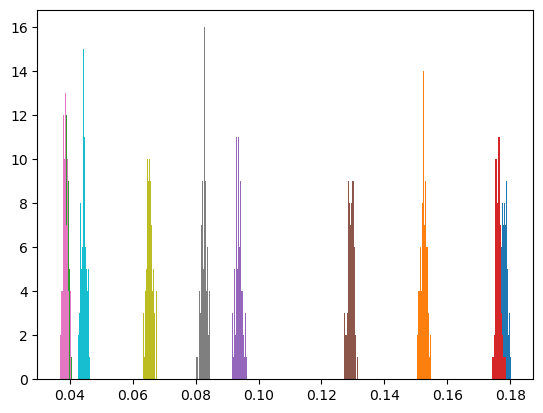

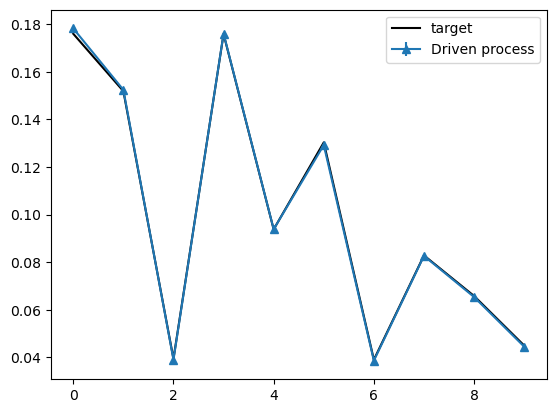

In [164]:
# Example usage
N = 500  # Number of particles
T = 100   # Number of time steps
S = 100   # Number of simulations

array_fraction = list()
for s in tqdm.tqdm(range(S)):
    array_fraction.append(simulate_dynamics_1(N, H, T, beta, transition_matrix, 1, p)[1])
    
x = list()
mean = list()
stdev = list()
for node_focus in range(H):
    x.append([np.array(array_fraction[s][node_focus]) for s in range(S)])
    #proba, bins = np.histogram(x[node_focus], bins=20)
    mean.append(np.mean(x[node_focus]))
    stdev.append(np.std(x[node_focus]))
    plt.hist(x[node_focus], bins=20)
plt.show()

ascissa = [i for i in range(H)]
plt.errorbar(ascissa, mean, stdev, linestyle='-', marker='^', label='Driven process')
plt.plot(ascissa, barphilist, c='black', label = 'target')
plt.legend()
plt.show()

## Is there an optimal beta such that we can restore a uniform stationary state (no crowdness on any node)?

In [ ]:
## Rate functions as functions of beta for a sequence of rare events

s=1
tot_cases = 99
barphilist_array = list()
inzero = 0.0
dinzero = 0.005
p=1.
tolp = 1E-5

for i in range(tot_cases):
    barphilist_array.append([(1.-inzero)/(H-1) for j in range(H-1)])
    barphilist_array[i].insert(s, inzero)
    #barphilist_array[i].insert(1, inzero)
    inzero+=dinzero
#print(barphilist_array)
      
domainbeta_array = list()
ratefunctionVSbeta_array = list()

for t in range(tot_cases):

    barphilist = barphilist_array[t]
    #print(barphilist)
    index_max = np.argmax(barphilist[1:])+1
    
    pcritical = 1 - barphilist[index_max]
    #print(pcritical)

    ## Beta critical

    if(p > pcritical):

        betasol = root_scalar(betacriticalfun,args=(index_max,barphilist,p),method='bisect',bracket=[(1.-p)/p+tolp,100.])
        beta_critical = betasol.root

        beta = beta_critical
        dbeta = 0.025
        total_iterations = int(3./dbeta) - int(beta_critical/dbeta)
        #print(total_iterations)
        ind_beta = 0

        domainbeta_array.append(list())
        ratefunctionVSbeta_array.append(list())

        with tqdm.tqdm(total=total_iterations) as pbar:
            while(ind_beta <= total_iterations):
                #print(ind_beta)
                #print(beta)

                max_rho3 = scipy.optimize.fmin(lambda x: -func(x, index_max, beta, barphilist,p), 0.5, disp=False)
                #print("sign",func(0.,index_max,beta,barphilist,p)*func(max_rho3[0],index_max,beta,barphilist,p) < 0)

                if(func(0.,index_max,beta,barphilist,p)*func(max_rho3[0],index_max,beta,barphilist,p) < 0):
                    ## Running algorithm
                    #print("yes")
                    rho3 = list()
                    temp = 0
                    for index in range(H):
                        if(index!=s):
                            sol = root_scalar(func,args=(index,beta,barphilist,p),method='bisect',bracket=[0.,max_rho3[0]])
                            temp += sol.root
                            rho3.append(sol.root)
                    #print(1-temp)
                    rho3.insert(0,1-temp)
                    #print(rho3, "\n")
                    
                    #quick fix
                    #if(rho3[0]<1E-8 and rho3[0]>-1E-8):
                        #print(beta)
                    #    rho3[0] = 1E-8
                        #print(rho3)

                    if(all(n > 0 for n in rho3)):
                        
                        #print(rho3)

                        u0 = [rnd.random() for _ in range(H)]
                        v0 = [rnd.random() for _ in range(H)]

                        erru = list()
                        errv = list()

                        tolerance = 1E-9
                        epsilon = 0.2 #Learning rate

                        error = 1.

                        while(error > tolerance):
                            u = list()
                            v = list()
                            for index in range(H):
                                u.append(equ(u0,v0,index,H,adj_list,Pi))
                            #print("u:", u, "\n")
                            for index in range(H):
                                v.append(eqv(barphilist,barphilist,u0,v0,rho3,index,H,p,adj_list,Pi))
                            #print("v:", v, "\n")

                            error = np.max(np.abs(list(np.asarray(u)-np.asarray(u0))+list(np.asarray(v)-np.asarray(v0))))
                            u0 = np.asarray(copy.deepcopy(u0))*(1-epsilon) + np.asarray(copy.deepcopy(u))*epsilon
                            v0 = np.asarray(copy.deepcopy(v0))*(1-epsilon) + np.asarray(copy.deepcopy(v))*epsilon
                        #print(u)
                        #print(v)
                        #print(error)
                        ratefunction = 0
                        for i in range(H):
                            for j in range(H):
                                if(j in adj_list[i][1:]):
                                    ratefunction += Pi[i][j]*barphilist[i]*u[i]*v[j]*np.log(u[i]*v[j])
                        domainbeta_array[t].append(beta)
                        ratefunctionVSbeta_array[t].append(ratefunction/2.)
                ind_beta+=1
                beta+=dbeta
                pbar.update(1)

115it [00:00, 573.53it/s]                                                       
115it [00:29,  3.95it/s]                                                        
115it [00:34,  3.30it/s]                                                        
 74%|██████████████████████████████▉           | 84/114 [00:19<00:15,  1.88it/s]

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Parameters for the function
N = 20  # Example value for N
p = 1.    # Example value for p

# Assuming ratefunctionVSbeta_array is your list of lists and domainbeta_array is defined
# Example: 99 inzero values from 0.0 to 0.49
inzero_array = np.linspace(0.00, 0.49, 99)

# Gather all the data into lists for scatter plotting (no need for padding)
inzero_values = []
beta_values = []
rate_values = []

for i, (ratefunction_list, beta_list) in enumerate(zip(ratefunctionVSbeta_array, domainbeta_array)):
    inzero_values.extend([inzero_array[i]] * len(ratefunction_list))  # Repeat the inzero value for each beta
    beta_values.extend(beta_list)
    rate_values.extend(ratefunction_list)

# Set up the figure and axis
#plt.figure(figsize=(10, 6))

# Create a custom colormap with a logarithmic normalization
# We must filter out zero or negative values since log is undefined for these
vmin = np.min([r for r in rate_values if r > 0])  # Minimum positive value
vmax = np.max(rate_values)  # Maximum value

# Create scatter plot using logarithmic normalization for the colors
norm = mcolors.LogNorm(vmin=vmin, vmax=vmax)
scatter = plt.scatter(inzero_values, beta_values, c=rate_values, cmap='viridis', norm=norm, s=30)

# Add a colorbar and labels
plt.colorbar(scatter, label='Rate Function (log scale)')
plt.title("Logarithmic Density Plot of Rate Function vs Beta")
plt.xlabel('Inzero')
plt.ylabel('Beta')

plt.xlim([0.,0.5])
plt.ylim([0.,5.])
# Add a legend
plt.legend()

# Tighten the layout to remove extra space
plt.tight_layout()

# Display the plot
plt.show()

ValueError: Invalid vmin or vmax

Error in callback <function _draw_all_if_interactive at 0x7e822ee8f9d0> (for post_execute):


ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 640x480 with 2 Axes>

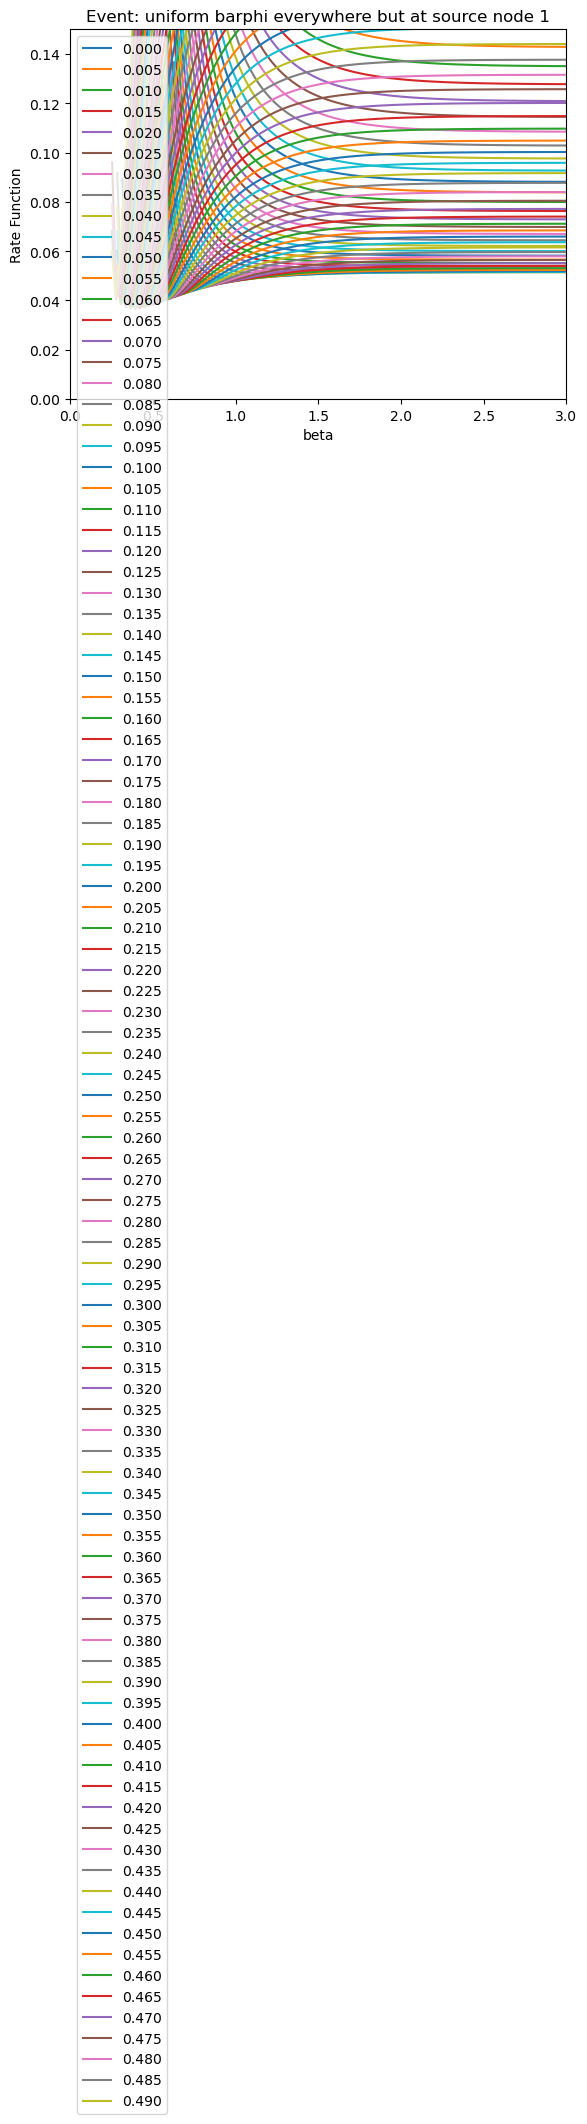

In [19]:
for t in range(tot_cases):
    plt.plot(domainbeta_array[t],ratefunctionVSbeta_array[t],label="%.3f"%barphilist_array[t][0])

# Add labels and a title
plt.xlabel('beta')
plt.ylabel('Rate Function')
plt.title('Event: uniform barphi everywhere but at source node 1')
plt.xlim([0,3])
plt.ylim([0,0.15])
plt.legend()
#plt.yscale('log')

# Show the plot
plt.show()

In [21]:
# Prepare the data for export
data_to_export = list(zip(inzero_values, beta_values, rate_values))

# File path for export
file_path = 'RateFunctionVSInZeroAndBeta_BA_s0.txt'  # Change the file path as needed

# Write data to a text file in the format x y z
with open(file_path, 'w') as f:
    for x, y, z in data_to_export:
        f.write(f"{x:.6f} {y:.6f} {z:.6f}\n")

print(f"Data exported successfully to {file_path}")

Data exported successfully to RateFunctionVSInZeroAndBeta_BA_s0.txt


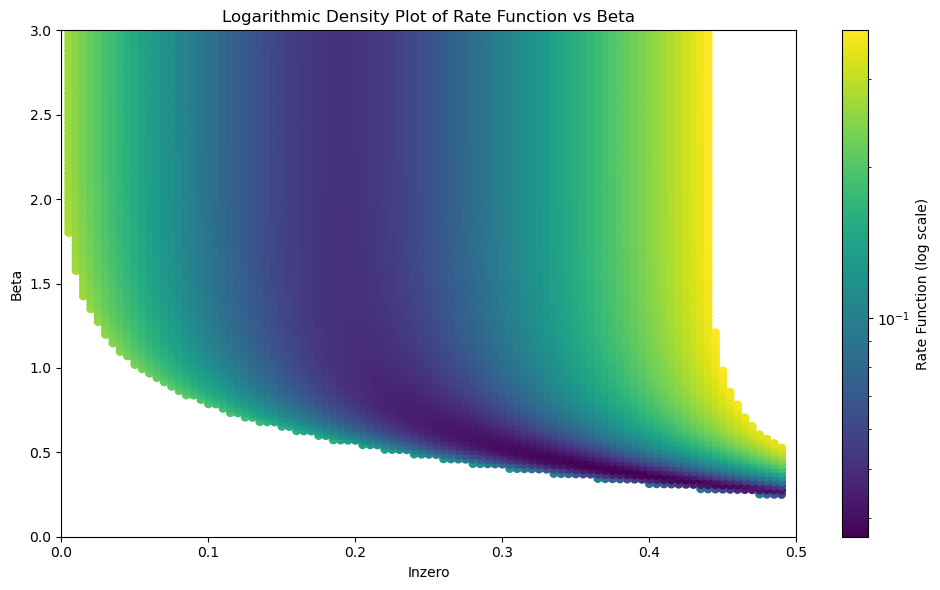

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# File path for import
file_path = 'RateFunctionVSInZeroAndBeta_BA_s0.txt'  # Change the file path if necessary

# Load data from the file
data = np.loadtxt(file_path)

# Remove rows with NaNs
data = data[~np.isnan(data).any(axis=1)]

# Extract x, y, z columns
inzero_values = data[:, 0]
beta_values = data[:, 1]
rate_values = data[:, 2]

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a custom colormap with a logarithmic normalization
vmin = np.min([r for r in rate_values if r > 0])  # Minimum positive value
vmax = np.max(rate_values)  # Maximum value
norm = mcolors.LogNorm(vmin=vmin, vmax=vmax)

# Scatter plot
scatter = plt.scatter(inzero_values, beta_values, c=rate_values, cmap='viridis', norm=norm, s=30)

# Add a colorbar and labels
plt.colorbar(scatter, label='Rate Function (log scale)')
plt.title("Logarithmic Density Plot of Rate Function vs Beta")
plt.xlabel('Inzero')
plt.ylabel('Beta')

# Set axis limits (adjust as needed)
plt.xlim([0., 0.5])
plt.ylim([0., 3.])

# Tighten the layout to remove extra space
plt.tight_layout()

# Display the plot
plt.show()
